# Data Analysis of The Office (US)

This notebook utilises two datasets from Kaggle users:
1. The complete dialogue, thanks to Nasir Khalid https://www.kaggle.com/nasirkhalid24
2. The IMDb ratings of each episode, thanks to Neha Prabhavalkar https://www.kaggle.com/nehaprabhavalkar

The intention is to explore both datasets, cleanse where necessary, and join to find interesting patterns.

## Exploratory Data Analysis

In [226]:
# import libraries
import numpy as np
import pandas as pd

In [227]:
# read data
transcript = pd.read_csv("../input/the-office-us-complete-dialoguetranscript/The-Office-Lines-V4.csv")
episodes = pd.read_csv("../input/the-office-dataset/the_office_series.csv")

In [228]:
transcript.describe()

,season,episode,scene
count,54626.000000,54626.000000,54626.000000
mean,5.541134,12.545931,4195.014755
std,2.341671,7.294761,2287.935869
min,1.000000,1.000000,1.000000
25%,4.000000,6.000000,2343.250000
50%,6.000000,12.000000,4239.000000
75%,8.000000,19.000000,6142.000000
max,9.000000,28.000000,8157.000000


In [229]:
episodes.describe()

,Unnamed: 0,Season,Ratings,Votes,Viewership,Duration
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000


In [230]:
transcript.head()

,season,episode,title,scene,speaker,line,Unnamed: 6
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,NaN
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",NaN
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,NaN
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",NaN
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",NaN


In [231]:
episodes.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


We note there is an unnamed column in both datasets...

## Data Cleansing

In [232]:
# drop the weird empty column in transcript df
transcript.drop(transcript.columns[len(transcript.columns)-1], axis=1, inplace=True)

transcript.head()

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So..."
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done."


The first column of the Episodes dataframe is unnamed, but we can assume this is the episode number.
Let's rename it.
We also note it starts at 0, so let's increment it by one such that Pilot is episode 1, not episode 0.

In [233]:
episodes.rename( columns={'Unnamed: 0':'EpisodeNumber'}, inplace=True )
episodes['EpisodeNumber'] = episodes['EpisodeNumber'] + 1
episodes

,EpisodeNumber,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,1,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,2,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,3,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,4,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,5,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,19 April 2005,NaN,Greg Daniels,Greg Daniels
...,...,...,...,...,...,...,...,...,...,...,...,...
183,184,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,11 April 2013,NaN,Matt Sohn,Dan Sterling
184,185,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,25 April 2013,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein
185,186,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2 May 2013,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright
186,187,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,9 May 2013,NaN,David Rogers,Brent Forrester


In [234]:
# check episode data from transcript df
transcript_episodes = transcript[['season', 'episode', 'title']].drop_duplicates().reset_index()
transcript_episodes

,index,season,episode,title
0,0,1,1,Pilot
1,228,1,2,Diversity Day
2,431,1,3,Health Care
3,674,1,4,The Alliance
4,917,1,5,Basketball
...,...,...,...,...
181,52734,9,19,Stairmageddon
182,52994,9,20,Paper Airplane
183,53227,9,21,Livin' the Dream
184,53609,9,22,A.A.R.M


We note there are 188 episodes in the IMDB ratings dataset, but only 186 in the transcript dataset. 

Although joining on episode name might be tricky due to them being strings and potentially inconsistent use of grammar and/or "the" etc., let's give it a crack.

In [235]:
missing_episodes1 = np.setdiff1d(episodes['EpisodeTitle'],transcript['title'])
missing_episodes1 = pd.DataFrame(missing_episodes1)
missing_episodes1

,0
0,A Benihana Christmas
1,A.A.R.M.
2,Boys and Girls
3,Classy Christmas
4,Dunder Mifflin Infinity
5,Fun Run
6,Get the Girl
7,"Goodbye, Toby"
8,Last Day in Florida
9,Launch Party


In [236]:
# check the other way

missing_episodes2 = np.setdiff1d(transcript['title'], episodes['EpisodeTitle'])
missing_episodes2 = pd.DataFrame(missing_episodes2)
missing_episodes2

,0
0,A Benihana Christmas (Parts 1&2)
1,A.A.R.M
2,Boys & Girls
3,Classy Christmas (Parts 1&2)
4,Dunder Mifflin Infinity (Parts 1&2)
5,Fun Run (Parts 1&2)
6,Get The Girl
7,"Goodbye, Toby (Parts 1&2)"
8,Last Day In Florida
9,Launch Party (Parts 1&2)


We can see a fair few of the "missing' episodes relate to Parts 1 and 2...


I like the look of the episode titles from the IMDb dataframe more than the transcript one, so let's standardise towards those.

In [237]:
transcript.loc[(transcript.title == 's*x Ed'),'title']='Sex Ed'
transcript.loc[(transcript.title == 'Weight Loss (Parts 1&2)'),'title']='Weight Loss'
transcript.loc[(transcript.title == 'The New Guys'),'title']='New Guys'
transcript.loc[(transcript.title == 'The Michael Scott Paper Company'),'title']='Michael Scott Paper Company'
transcript.loc[(transcript.title == 'The Manager and the Salesman'),'title']='Manager and Salesman'
transcript.loc[(transcript.title == 'The Job (Parts 1&2)'),'title']='The Job'
transcript.loc[(transcript.title == 'Test The Store'),'title']='Test the Store'
transcript.loc[(transcript.title == 'Stress Relief (Parts 1&2)'),'title']='Stress Relief'
transcript.loc[(transcript.title == 'Search Committee (Parts 1&2)'),'title']='Search Committee'
transcript.loc[(transcript.title == 'Money (Parts 1&2)'),'title']='Money'
transcript.loc[(transcript.title == 'Lecture Circuit (Part 2)'),'title']='Lecture Circuit: Part 2'
transcript.loc[(transcript.title == 'Lecture Circuit (Part 1)'),'title']='Lecture Circuit: Part 1'
transcript.loc[(transcript.title == 'Launch Party (Parts 1&2)'),'title']='Launch Party'
transcript.loc[(transcript.title == 'Last Day In Florida'),'title']='Last Day in Florida'
transcript.loc[(transcript.title == 'Goodbye, Toby (Parts 1&2)'),'title']='Goodbye, Toby'
transcript.loc[(transcript.title == 'Get The Girl'),'title']='Get the Girl'
transcript.loc[(transcript.title == 'Fun Run (Parts 1&2)'),'title']='Fun Run'
transcript.loc[(transcript.title == 'Dunder Mifflin Infinity (Parts 1&2)'),'title']='Dunder Mifflin Infinity'
transcript.loc[(transcript.title == 'Classy Christmas (Parts 1&2)'),'title']='Classy Christmas'
transcript.loc[(transcript.title == 'Boys & Girls'),'title']='Boys and Girls'
transcript.loc[(transcript.title == 'A.A.R.M'),'title']='A.A.R.M.'
transcript.loc[(transcript.title == 'A Benihana Christmas (Parts 1&2)'),'title']='A Benihana Christmas'

This leaves us in a pickle as the transcript combines the following two episodes, but they have separate IMDb ratings:
### Transcript
* The Delivery (Parts 1&2)
* Niagara (Parts 1&2)

### IMDb
* Niagara: Part 1
* Niagara: Part 2
* The Delivery: Part 1
* The Delivery: Part 2

Let's check what the IMDb ratings were, as we can potentially combine these in the ratings dataset and use the average rating.

In [238]:
episodes[episodes['EpisodeTitle'].isin(['Niagara: Part 1', 'Niagara: Part 2', 'The Delivery: Part 1', 'The Delivery: Part 2'])]

,EpisodeNumber,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
94,95,6,Niagara: Part 1,The Office travels to Niagara Falls to celebra...,9.4,4560,9.42,30,8 October 2009,NaN,Paul Feig,Greg Daniels | Mindy Kaling
95,96,6,Niagara: Part 2,Pam is forced to deal with an embarrassing inj...,9.4,3114,9.42,19,8 October 2009,NaN,Paul Feig,Greg Daniels | Mindy Kaling
107,108,6,The Delivery: Part 1,Pam goes into labor and Jim is ready to take h...,8.4,2347,9.00,30,4 March 2010,NaN,Seth Gordon,Daniel Chun
108,109,6,The Delivery: Part 2,"After the baby is born, Pam has trouble gettin...",8.5,2370,9.00,30,4 March 2010,Mellisa Rauch,Harold Ramis,Daniel Chun


We observe that the viewership numbers are identical for both parts, which makes sense because they aired on the same night / the same continuous show and in fact if you refer to Wikipedia episodes lists they are combined for viewership figures. 

Ratings are almost identical as well, with only 0.1 difference for The Delivery Parts 1 & 2. 

Let's clean up the names.

In [239]:
# clean transcript titles
transcript.loc[(transcript.title == 'The Delivery (Parts 1&2)'),'title']='The Delivery'
transcript.loc[(transcript.title == 'Niagara (Parts 1&2)'),'title']='Niagara'

In [240]:
# create NEW entries into  episodes table

temp = episodes[(episodes['EpisodeNumber'] == 95) | (episodes['EpisodeNumber'] == 108)]
temp = temp.copy() # copy because we don't need to worry about changes propogating back to original episode table
temp['EpisodeTitle'] = temp['EpisodeTitle'].str.replace(': Part 1','')

# maybe do some averaging here?
# and concat the "about" text etc

# insert back into episodes table
episodes = pd.concat([episodes, temp])
episodes

# drop rows we won't keep
episodes = episodes[-episodes['EpisodeTitle'].isin(['Niagara: Part 1', 'Niagara: Part 2', 'The Delivery: Part 1', 'The Delivery: Part 1'])]
episodes

,EpisodeNumber,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,1,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,2,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,3,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,4,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,5,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,19 April 2005,NaN,Greg Daniels,Greg Daniels
...,...,...,...,...,...,...,...,...,...,...,...,...
185,186,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2 May 2013,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright
186,187,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,9 May 2013,NaN,David Rogers,Brent Forrester
187,188,9,Finale,"One year later, Dunder Mifflin employees past ...",9.8,10515,5.69,51,16 May 2013,"Joan Cusack, Ed Begley Jr, Rachel Harris, Nanc...",Ken Kwapis,Greg Daniels
94,95,6,Niagara,The Office travels to Niagara Falls to celebra...,9.4,4560,9.42,30,8 October 2009,NaN,Paul Feig,Greg Daniels | Mindy Kaling


Finally, let's confirm there is now a match for all episode titles that appear in the Transcript data, in the Episode data.

In [241]:
missing_episodes2 = np.setdiff1d(transcript['title'], episodes['EpisodeTitle'])
missing_episodes2 = pd.DataFrame(missing_episodes2)
missing_episodes2

,0


Looks good. 

Now let's do some analysis on all speakers in the Transcript data.

In [242]:
# summarise unique speakers
speakers = pd.DataFrame(transcript['speaker'].value_counts())
speakers.describe()

,speaker
count,775.000000
mean,70.485161
std,570.107070
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,10773.000000


In [243]:
# there are 775 unique speakers with a median of 3 lines spoken
# check top 60 speakers by number of lines to review
speakers.nlargest(60, 'speaker')

,speaker
Michael,10773
Dwight,6752
Jim,6222
Pam,4973
Andy,3698
Kevin,1535
Angela,1534
Erin,1413
Oscar,1336
Ryan,1182


Some takeaways...
* Deangelo is duplicated as "Deangelo" and "DeAngelo"
* "Darryl" and "Daryl"
* "David Wallace" and "David"
* "Todd Packer" and "Todd"
* A fair few speakers with the colon (":") at the end, causing them to appear distinct
* "All", "Everyone" and "Group" are all essentially the same thing

Let's trim values, remove colons, and adjust those name typos. 

We will also set all "Todd Packer" to "Packer" and "David Wallace" to "David" for consistency sake.

When we look at capturing mentions of characters, having just "David" - for example - will also be beneficial as Michael speaking the words "David Wallace" will be flagged if we used "David" or "David Wallace" as his official name, but the inverse is not true, i.e. if we require a mention of "David Wallace" then a line of dialogue referring to just "David" will not be captured.

In [244]:
transcript['speaker'] = transcript['speaker'].str.strip()
transcript['speaker'] = transcript['speaker'].str.replace(':','')
transcript['speaker'] = transcript['speaker'].str.replace('Deangelo','DeAngelo')

transcript.loc[(transcript.speaker == 'David Wallace'),'speaker']='David'
transcript.loc[(transcript.speaker == 'Todd'),'speaker']='Packer'
transcript.loc[(transcript.speaker == 'Todd Packer'),'speaker']='Packer'
transcript.loc[(transcript.speaker == 'Daryl'),'speaker']='Darryl'
transcript.loc[(transcript.speaker == 'All'),'speaker']='Everyone'
transcript.loc[(transcript.speaker == 'Group'),'speaker']='Everyone'

In [245]:
speakers = pd.DataFrame(transcript['speaker'].value_counts())
speakers.describe()

,speaker
count,738.000000
mean,74.018970
std,588.228068
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,10850.000000


We now have 738 unique speakers, meaning we managed to remove 37 duplicates.

In [246]:
# check top 60 speakers again to review
speakers.nlargest(60, 'speaker')

,speaker
Michael,10850
Dwight,6789
Jim,6258
Pam,5005
Andy,3733
Angela,1551
Kevin,1542
Erin,1429
Oscar,1356
Darryl,1207


There are a few names I don't remember towards the bottom of this list, and this is only the top 60 of over 700 speakers. Let's check the distribution - we can probably truncate the list by requiring a minimum of x lines to keep it manageable.

In [247]:
speakers['cum_sum'] = speakers['speaker'].cumsum()
speakers['cum_perc'] = 100*speakers['cum_sum']/speakers['speaker'].sum()
speakers.nlargest(60, 'speaker')

,speaker,cum_sum,cum_perc
Michael,10850,10850,19.862337
Dwight,6789,17639,32.290484
Jim,6258,23897,43.746568
Pam,5005,28902,52.908871
Andy,3733,32635,59.742613
Angela,1551,34186,62.581921
Kevin,1542,35728,65.404752
Erin,1429,37157,68.020723
Oscar,1356,38513,70.503057
Darryl,1207,39720,72.712628


We observe that after Todd Packer's 158 lines of dialogue we've captured 91.8% of all lines. We also note the next most prevalent speaker is "Everyone" which was our combination of "Group", "All", and "Everyone". 

Let's make a judgement call to restrict our analysis to those speakers with more than 150 lines of dialogue over the entire series.

In [248]:
speakers_to_keep = speakers[speakers['speaker'] > 150]
speakers_to_keep

,speaker,cum_sum,cum_perc
Michael,10850,10850,19.862337
Dwight,6789,17639,32.290484
Jim,6258,23897,43.746568
Pam,5005,28902,52.908871
Andy,3733,32635,59.742613
Angela,1551,34186,62.581921
Kevin,1542,35728,65.404752
Erin,1429,37157,68.020723
Oscar,1356,38513,70.503057
Darryl,1207,39720,72.712628


In [249]:
# subset our transcript dataframe
# for just those speakers with > 150 lines
transcript_150min = transcript[transcript['speaker'].isin(speakers_to_keep.index)]

In [250]:
transcript_150min.describe()

,season,episode,scene
count,50172.000000,50172.000000,50172.000000
mean,5.512517,12.518576,4165.160548
std,2.332017,7.332473,2276.627981
min,1.000000,1.000000,1.000000
25%,3.000000,6.000000,2321.000000
50%,6.000000,12.000000,4181.000000
75%,7.000000,19.000000,6087.250000
max,9.000000,28.000000,8157.000000


We can see we now have 50,172 rows of dialogue, compared to 54,626 originally.

In [251]:
# summarise line counts by speaker by season
line_counts = transcript_150min[['speaker', 'season', 'line']].groupby(['speaker', 'season']).count()
line_counts = line_counts.reset_index()

In [252]:
# create collection of dataframes
# each one a season subset of line_counts

seasons = {}

for i in range(1,10):
    seasons[i] = line_counts[line_counts['season'] == i].sort_values(by=['line'], ascending = False)

## Data Visualisation

In [253]:
# import viz libraries

import matplotlib.pyplot as plt
import seaborn as sns

Let's define some consistent colours to help highlight key characters across multiple viz. 

I love Stephen Few's colour schemes, as described in "Show Me the Numbers".

In [254]:
colours = {'Michael':'#88BDE6', 'Dwight':'#FBB258', 'Jim':'#90CD97', 'Pam':'#F6AAC9',
          'Andy':'#BC99C7'}

colour_plot = '#FFFAF0'
colour_grey = '#CCCCCC'

In [255]:
# create a dictionary for ALL values in the speakers_to_keep
# set to grey for default
# then assign specific colour if we've created one above

colours_complete = dict.fromkeys(speakers_to_keep.index, colour_grey)
        
for key in colours_complete:
    if key in colours:
        colours_complete[key] = colours[key]

Let's look at number of lines spoken by season.

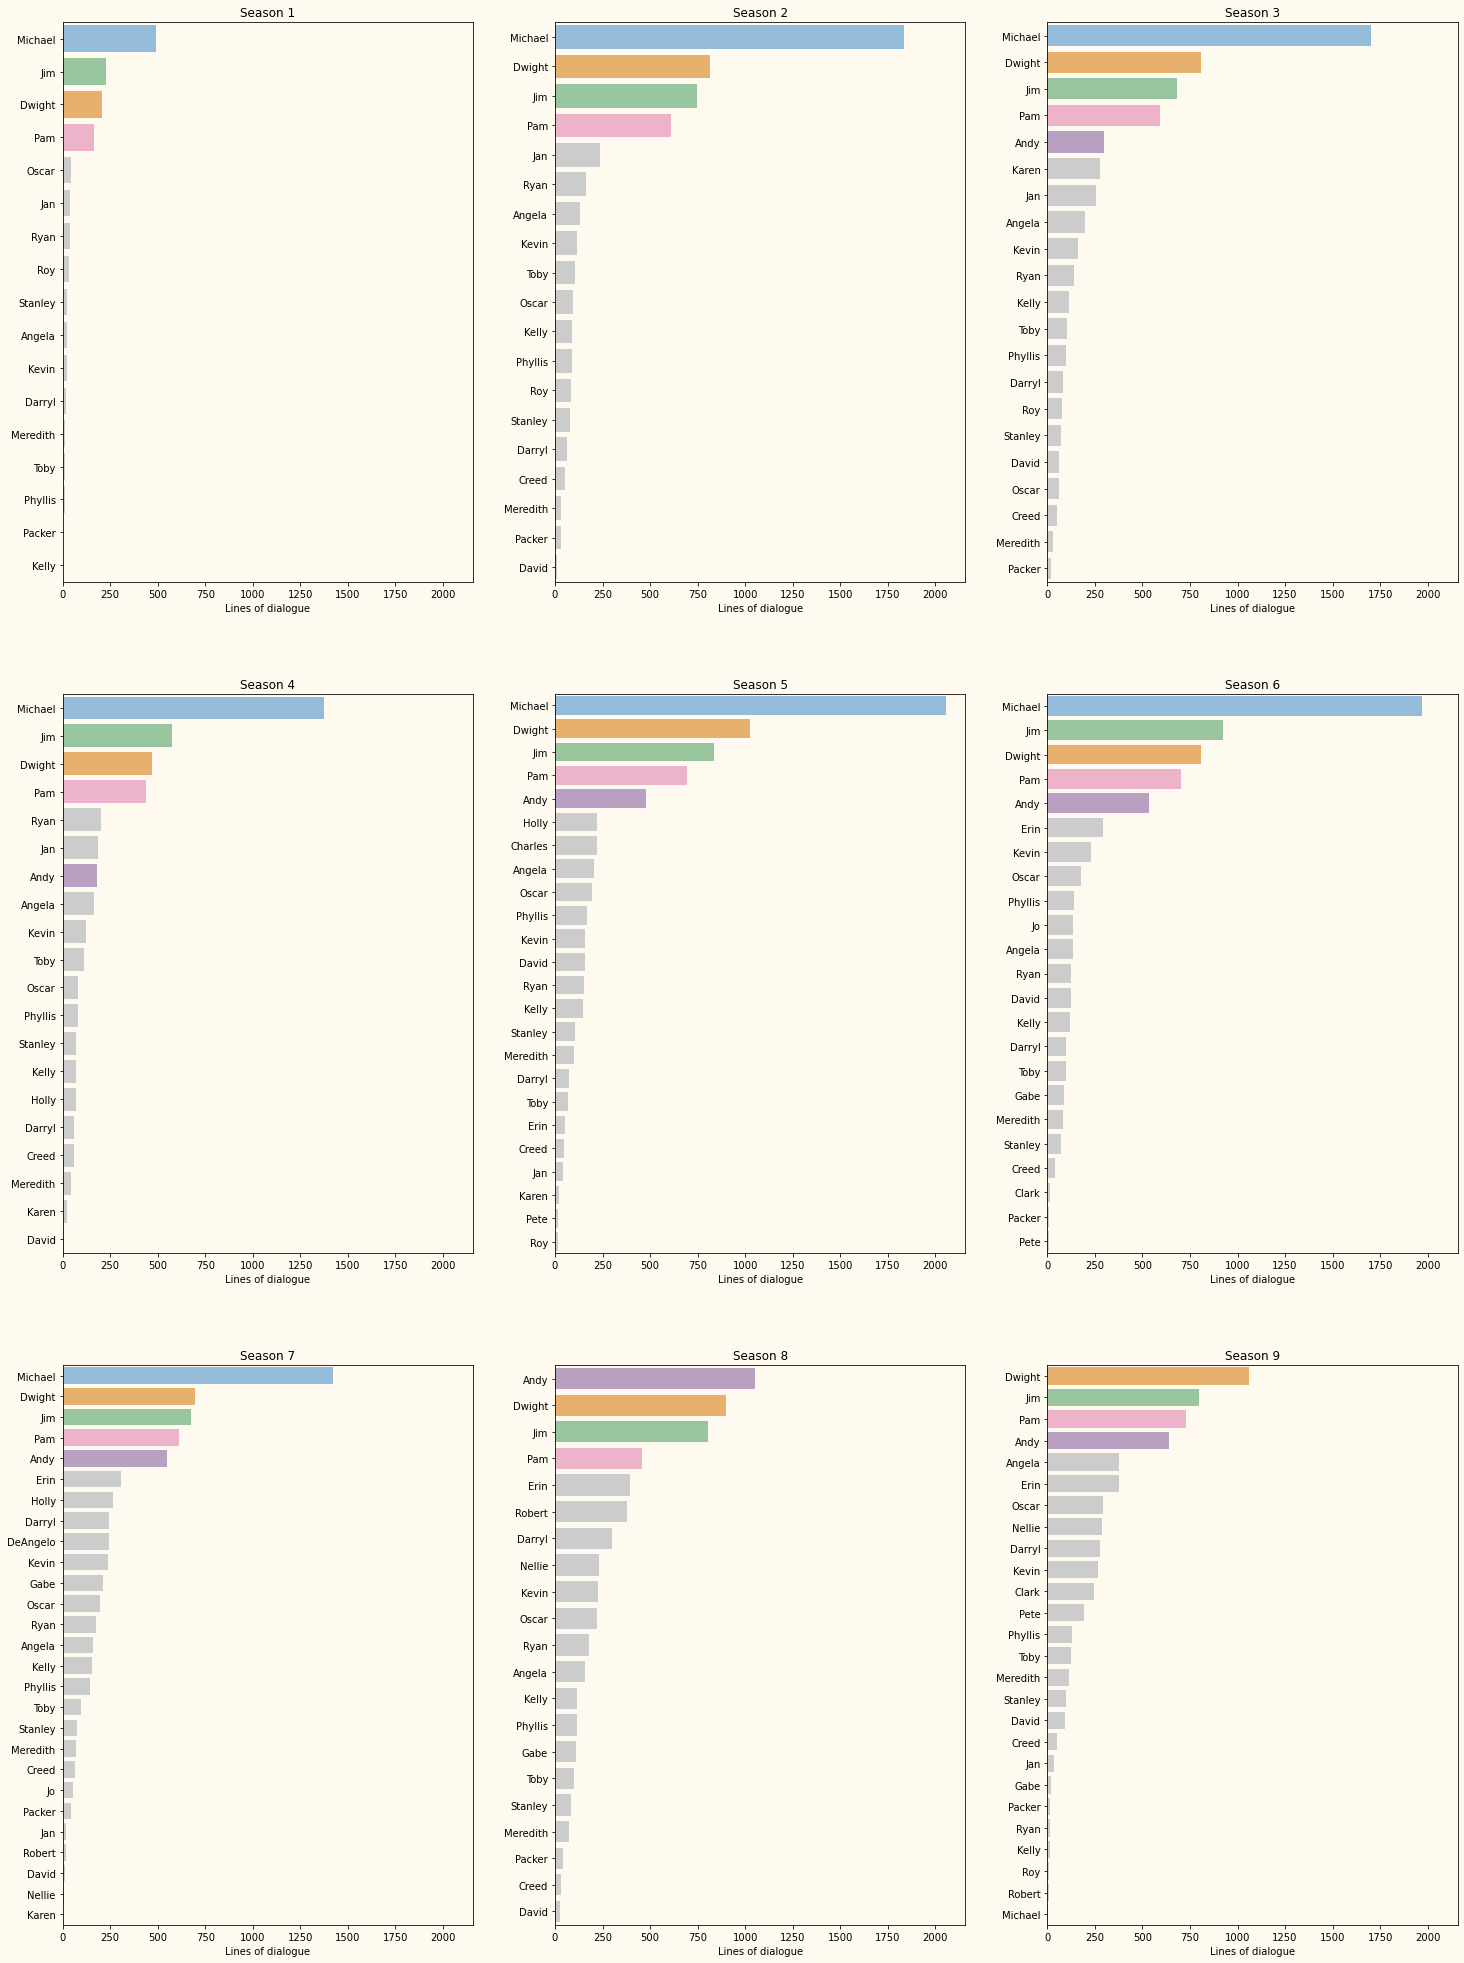

In [256]:
fig, ax = plt.subplots(3, 3, figsize=(25,35), sharey = False, sharex = True)

for i in range(0,3):
    for j in range(0,3):
        sns.barplot(x='line', y='speaker', data=seasons[i * 3 + j + 1], ax = ax[i, j], hue = 'speaker', palette = colours_complete, dodge = False)
        ax[i, j].set_title('Season ' + str(i * 3 + j + 1))
        ax[i, j].set_ylabel('')
        ax[i, j].set_xlabel('Lines of dialogue')
        ax[i, j].legend_.remove()
        ax[i, j].set_facecolor(colour_plot)
        ax[i, j].xaxis.set_tick_params(which='both', labelbottom = True) # ensure axis labels are on each plot not just the bottom ones
        
fig.patch.set_facecolor(colour_plot)

The small multiples above instantly give us some key take-aways:
* Season one is a smaller season, hence fewer total lines spoken
* Michael leaves the series after season seven
* Michael is such a dominant character that even after his departure no-one comes close to his line count per season
* Jim, Pam and Dwight never leave the top four in any season
* Andy races up the leaderboard!

Now let's check who mentions whom...

Disclaimer, this will not capture nicknames such as "Nard-Dog" for Andy or "Big Tuna" for Jim. 

It is also strictly for "mentions", e.g. Michael talking to Dwight without mentioning Dwight's name isn't considered a mention.

In [257]:
# create new column in transcript dataframe
# one per character we are "keeping"
transcript_150min = pd.concat([transcript_150min,pd.DataFrame(columns=speakers_to_keep.index)])

# populate this column with Boolean if that character was mentioned in this line of dialogue
for substring in list(speakers_to_keep.index):
    transcript_150min[substring] = transcript_150min['line'].str.contains(substring)

In [258]:
transcript_150min

,season,episode,title,scene,speaker,line,Michael,Dwight,Jim,Pam,...,Robert,Creed,Karen,Clark,DeAngelo,Charles,Roy,Pete,Jo,Packer
0,1.0,1.0,Pilot,1.0,Michael,All right Jim. Your quarterlies look very good...,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1.0,1.0,Pilot,1.0,Jim,"Oh, I told you. I couldn't close it. So...",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,1.0,Pilot,1.0,Michael,So you've come to the master for guidance? Is ...,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,1.0,Pilot,1.0,Jim,"Actually, you called me in here, but yeah.",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1.0,Pilot,1.0,Michael,"All right. Well, let me show you how it's done.",False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54621,9.0,24.0,Finale,8153.0,Creed,It all seems so very arbitrary. I applied for ...,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54622,9.0,24.0,Finale,8154.0,Meredith,I just feel lucky that I got a chance to share...,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54623,9.0,24.0,Finale,8155.0,Phyllis,I'm happy that this was all filmed so I can re...,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54624,9.0,24.0,Finale,8156.0,Jim,I sold paper at this company for 12 years. My ...,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [259]:
# summarise transcripts by season, episode, speaker, and how many times key characters were mentioned by said speaker
speaker_counts = transcript_150min.drop(labels='scene', axis=1).groupby(['season', 'episode', 'title', 'speaker']).sum().reset_index()

In [260]:
speaker_counts = pd.melt(speaker_counts, id_vars=['season', 'episode', 'title', 'speaker']).rename(columns={"variable": "mentioned", "value": "mention_count"})
speaker_counts

,season,episode,title,speaker,mentioned,mention_count
0,1.0,1.0,Pilot,Angela,Michael,0
1,1.0,1.0,Pilot,Dwight,Michael,0
2,1.0,1.0,Pilot,Jan,Michael,2
3,1.0,1.0,Pilot,Jim,Michael,0
4,1.0,1.0,Pilot,Kevin,Michael,0
...,...,...,...,...,...,...
88655,9.0,24.0,Finale,Pete,Packer,0
88656,9.0,24.0,Finale,Phyllis,Packer,0
88657,9.0,24.0,Finale,Ryan,Packer,0
88658,9.0,24.0,Finale,Stanley,Packer,0


In [261]:
lines_spoken_all_seasons = transcript_150min[['speaker', 'line']].groupby(['speaker']).count().reset_index().rename(columns={"line": "total_lines"})

In [262]:
speaker_counts_all_seasons = speaker_counts[['speaker', 'mentioned', 'mention_count']].groupby(['speaker']).sum().reset_index()

In [263]:
lines_spoken_and_mentioned_all_seasons = pd.merge(speaker_counts_all_seasons, lines_spoken_all_seasons).sort_values(by=['total_lines'], ascending = False)
lines_spoken_and_mentioned_all_seasons['mentions_per_line'] = lines_spoken_and_mentioned_all_seasons['mention_count'] / lines_spoken_and_mentioned_all_seasons['total_lines']
lines_spoken_and_mentioned_all_seasons

,speaker,mention_count,total_lines,mentions_per_line
19,Michael,2477,10850,0.228295
8,Dwight,1343,6789,0.197820
13,Jim,1051,6258,0.167945
23,Pam,1075,5005,0.214785
0,Andy,635,3733,0.170104
1,Angela,323,1551,0.208253
17,Kevin,361,1542,0.234112
9,Erin,340,1429,0.237929
21,Oscar,329,1356,0.242625
5,Darryl,129,1207,0.106877


Now that we've done some transformation, let's visualise it with a linear regression.

Note we also keep the same colour scheme as above.

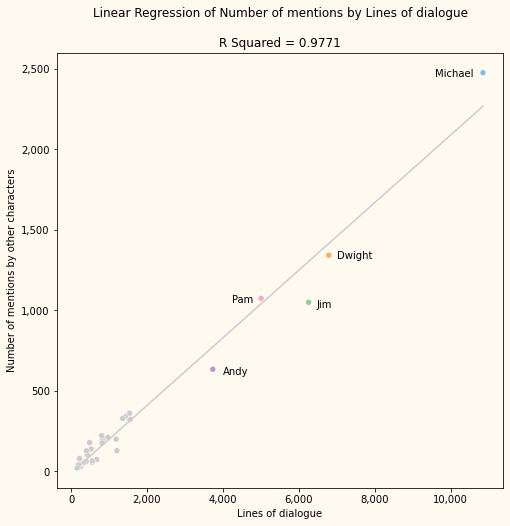

In [264]:
import matplotlib

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = np.array(lines_spoken_and_mentioned_all_seasons['total_lines']).reshape(-1,1)
Y = np.array(lines_spoken_and_mentioned_all_seasons['mention_count']).reshape(-1,1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

r2 = r2_score(Y, Y_pred, multioutput='variance_weighted')

fig, ax = plt.subplots(figsize=(8,8))

#plt.scatter(X, Y, color = '#88BDE6')

ax = sns.scatterplot(data=lines_spoken_and_mentioned_all_seasons, x=lines_spoken_and_mentioned_all_seasons['total_lines'], y=lines_spoken_and_mentioned_all_seasons['mention_count'], hue = 'speaker', palette = colours_complete)
ax.legend_.remove()
plt.plot(X, Y_pred, color=colour_grey)
ax.set_ylabel('Number of mentions by other characters')
ax.set_xlabel('Lines of dialogue')
plt.title('Linear Regression of Number of mentions by Lines of dialogue\n\nR Squared = ' + str(round(r2, 4)))

# format axes with thousands seperator
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# annotate the main characters
ax.text(9600, 2450, "Michael", horizontalalignment='left', size='medium', color='black')
ax.text(7000, 1320, "Dwight", horizontalalignment='left', size='medium', color='black')
ax.text(6475, 1020, "Jim", horizontalalignment='left', size='medium', color='black')
ax.text(4250, 1050, "Pam", horizontalalignment='left', size='medium', color='black')
ax.text(4000, 600, "Andy", horizontalalignment='left', size='medium', color='black')

ax.set_facecolor(colour_plot)
fig.patch.set_facecolor(colour_plot)

We observe a strong linear relationship between number of lines of dialogue and number of mentions.

We note Michael is mentioned more than the line of best fit would predict, given his number of lines, and Jim and Andy less than the line of best fit.

Michael may make sense - he is the boss and a polarising figure. We often see staff gossiping or debating about his behaviour!

Let's now see if we can get an idea of who mentions whom. My gut instinct is that Packer get talked about a lot by Michael, for example.

In [265]:
speakers_by_mentions = transcript_150min.groupby('speaker').sum().drop(labels=['season', 'episode', 'scene'], axis=1).reset_index()
speakers_by_mentions = speakers_by_mentions.set_index('speaker')
speakers_by_mentions = speakers_by_mentions.reindex(speakers_to_keep.index)
speakers_by_mentions.loc['Total',:]= speakers_by_mentions.sum(axis=0)
speakers_by_mentions.loc[:,'Total']= speakers_by_mentions.sum(axis=1)
speakers_by_mentions

,Michael,Dwight,Jim,Pam,Andy,Angela,Kevin,Erin,Oscar,Darryl,...,Creed,Karen,Clark,DeAngelo,Charles,Roy,Pete,Jo,Packer,Total
Michael,158.0,331.0,222.0,305.0,64.0,48.0,86.0,44.0,93.0,52.0,...,30.0,19.0,0.0,6.0,21.0,19.0,1.0,46.0,27.0,2477.0
Dwight,264.0,106.0,273.0,99.0,63.0,55.0,41.0,20.0,29.0,22.0,...,7.0,8.0,10.0,1.0,7.0,0.0,1.0,22.0,7.0,1343.0
Jim,179.0,243.0,44.0,196.0,50.0,22.0,18.0,4.0,15.0,10.0,...,8.0,19.0,4.0,0.0,5.0,19.0,6.0,20.0,3.0,1051.0
Pam,268.0,129.0,183.0,59.0,37.0,47.0,33.0,18.0,25.0,14.0,...,7.0,7.0,3.0,0.0,4.0,26.0,1.0,14.0,2.0,1075.0
Andy,43.0,79.0,48.0,32.0,45.0,34.0,21.0,83.0,19.0,38.0,...,6.0,3.0,8.0,1.0,2.0,0.0,7.0,11.0,0.0,635.0
Angela,28.0,71.0,11.0,30.0,24.0,9.0,38.0,2.0,26.0,0.0,...,2.0,0.0,1.0,0.0,7.0,4.0,0.0,1.0,0.0,323.0
Kevin,72.0,13.0,38.0,41.0,19.0,23.0,23.0,9.0,36.0,8.0,...,5.0,4.0,0.0,0.0,0.0,4.0,5.0,10.0,3.0,361.0
Erin,37.0,23.0,15.0,25.0,97.0,8.0,4.0,17.0,4.0,11.0,...,2.0,0.0,1.0,1.0,0.0,0.0,12.0,5.0,1.0,340.0
Oscar,71.0,25.0,18.0,24.0,28.0,44.0,35.0,8.0,5.0,3.0,...,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,329.0
Darryl,10.0,10.0,20.0,4.0,25.0,1.0,6.0,5.0,3.0,12.0,...,2.0,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,129.0


Good start, but if we heatmap this alone, it will just be heavily skewed to Michael and the other key top few characters due to line volume. 

The proof is in the pudding though, so let's test that.

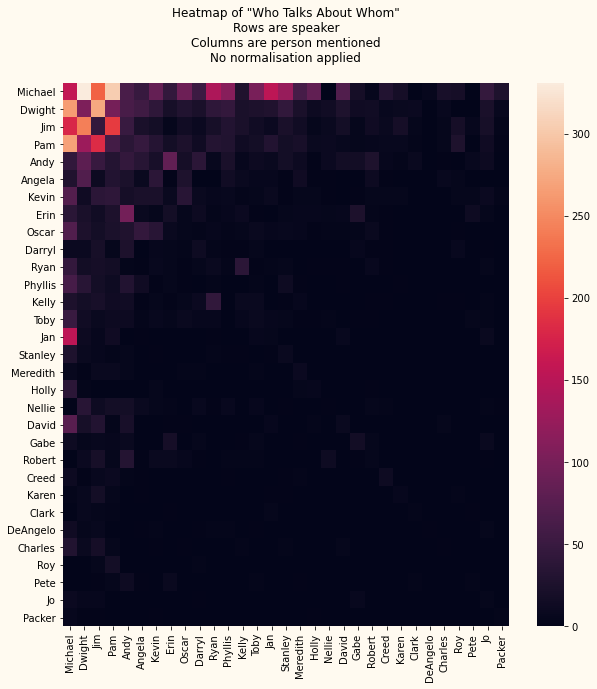

In [266]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.heatmap(speakers_by_mentions.drop(['Total'], axis=0).drop(['Total'], axis=1))
plt.title('Heatmap of "Who Talks About Whom"\nRows are speaker\nColumns are person mentioned\nNo normalisation applied\n')

ax.set_facecolor(colour_plot)
fig.patch.set_facecolor(colour_plot)

Yep, as expected, lots of colour top left and lots of black elsewhere.

So - to make it more interesting, let's normalise the data according to total volume of lines spoken. 

We'll do two:
1. Who speakers are talking about, normalised for how many lines they speak
2. Who is getting spoken about, normalised for how many times anyone spoke about them.

In [267]:
speakers_by_mentions_norm_speaker = speakers_by_mentions.drop(['Total'], axis=0).drop(['Total'], axis=1)
speakers_by_mentions_norm_speaker = speakers_by_mentions_norm_speaker.div(speakers_by_mentions_norm_speaker.sum(axis=1), axis=0)
#speakers_by_mentions_norm_speaker

speakers_by_mentions_norm_mentioned = speakers_by_mentions.drop(['Total'], axis=0).drop(['Total'], axis=1)
speakers_by_mentions_norm_mentioned = speakers_by_mentions_norm_mentioned.div(speakers_by_mentions_norm_mentioned.sum(axis=0), axis=1)

# transpose it such that reading it is more intuitive
speakers_by_mentions_norm_mentioned = speakers_by_mentions_norm_mentioned.transpose()

Let's see what that looks like...

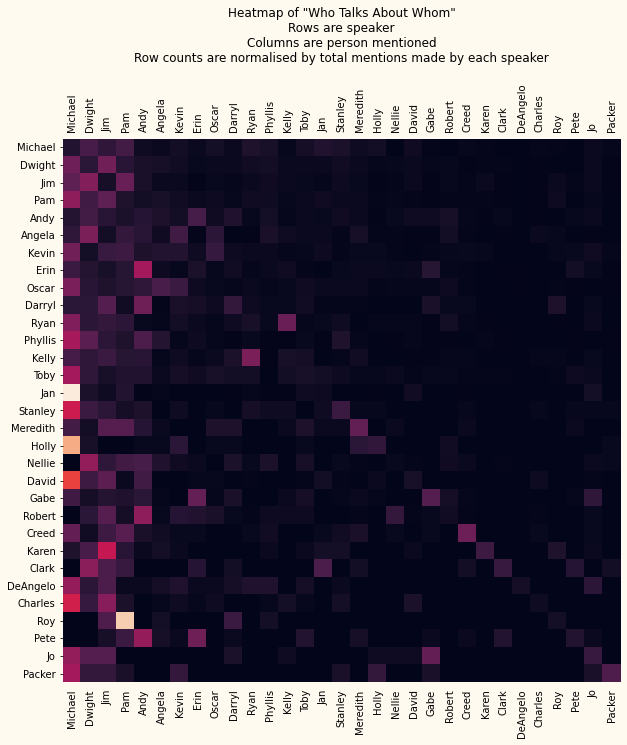

In [268]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.heatmap(speakers_by_mentions_norm_speaker, cbar = False)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=90)
plt.title('Heatmap of "Who Talks About Whom"\nRows are speaker\nColumns are person mentioned\nRow counts are normalised by total mentions made by each speaker\n')

ax.set_facecolor(colour_plot)
fig.patch.set_facecolor(colour_plot)

Once normalised for how many times he mentions someone, Michael's heatmap row is actually fairly consistent, with a few highlights around Dwight and Pam. 

Unsurprisingly, many people speak mainly about Michael. 

The biggest highlights are those who were in relationships:
* Jan who almost exclusively talks about Michael
* And likewise for Holly, although I do like that she has some colour with Kevin, from the episode where she believes him to be challenged!
* Roy largely speaks about Pam
* and Erin about Andy
* and Karen about Jim
* and Kelly about Ryan (and vice versa)

There is also some pattern along the diagonal, where characters are referencing themselves. This is likely due to introductions, but we can check this.

In [269]:
transcript_150min[(transcript_150min['speaker'] == 'Creed') & (transcript_150min['Creed'] == True)]

,season,episode,title,scene,speaker,line,Michael,Dwight,Jim,Pam,...,Robert,Creed,Karen,Clark,DeAngelo,Charles,Roy,Pete,Jo,Packer
7524,3.0,2.0,The Convention,1277.0,Creed,Andrea's the office bitch. You'll get used to ...,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
12370,3.0,21.0,Product Recall,2129.0,Creed,"Yes, hello. Creed Bratton, Quality Assurance, ...",False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
13969,4.0,1.0,Fun Run,2383.0,Creed,"Creed Bratton, 75 plus division.",False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
15519,4.0,7.0,Money,2604.0,Creed,Creed Bratton has never declared bankruptcy. W...,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
16253,4.0,11.0,Survivor Man,2740.0,Creed,You tell her it's for Creed. She'll know what ...,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
17726,4.0,17.0,Job Fair,2957.0,Creed,"Hiya Pumpkin, it's Creed.",False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
19457,5.0,5.0,Crime Aid,3237.0,Creed,Nobody steals from Creed Bratton and gets away...,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
33623,7.0,1.0,Nepotism,5113.0,Creed,You got Creed.,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
37542,7.0,14.0,The Seminar,5653.0,Creed,Creed! Ha!,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
40445,7.0,25.0,Search Committee,6048.0,Creed,"Okay, team building! On this side of the room...",False,False,True,True,...,False,True,False,False,False,False,False,False,False,False


Using Creed as an example, we can indeed see that lines where he's both speaker and mentioned are laregely around introductions. 

Now let's visualise mentions.

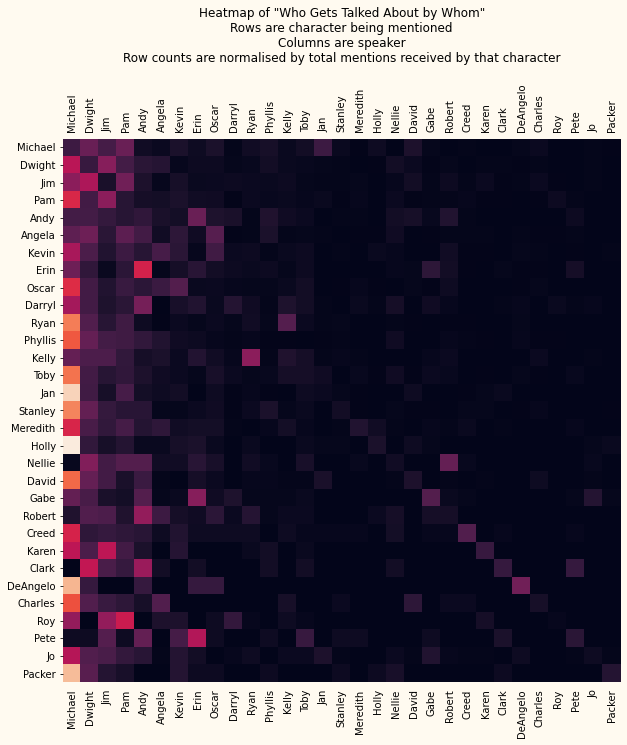

In [270]:
fig, ax = plt.subplots(figsize=(10,10))

ax = sns.heatmap(speakers_by_mentions_norm_mentioned, cbar = False)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=90)
plt.title('Heatmap of "Who Gets Talked About by Whom"\nRows are character being mentioned\nColumns are speaker\nRow counts are normalised by total mentions received by that character\n')

ax.set_facecolor(colour_plot)
fig.patch.set_facecolor(colour_plot)

Again, unsurprisingly, everyone gets talked about by Michael. 

However - he does have a few favourites, relatively speaking...
* Packer (legendary ex-colleague) and DeAngelo top his list
* Ryan (man-crush) also gets a lot of love
* Toby is highlighted as well... for... other reasons.

Michael aside, love interests play a big part again. 
* Erin gets mentioned mainly by Andy
* Kelly by Ryan
* and Ryan also gets some love from Kelly (but not as much as he does from Michael!)

Now let's turn our attention to episode ratings. I particularly want to examine the relationship between episode ratings and number of lines spoken by Michael.

In [271]:
#episodes
speaker_counts2 = speaker_counts[['title', 'speaker', 'mention_count']].groupby(['title', 'speaker']).sum().reset_index()
speaker_counts_michael = speaker_counts2[speaker_counts2['speaker'] == 'Michael']
speaker_counts_toby = speaker_counts2[speaker_counts2['speaker'] == 'Toby']

# merge with line counts
episodes_ratings_and_michael_lines = pd.merge(episodes, speaker_counts_michael, left_on = 'EpisodeTitle', right_on = 'title', how = 'left')
episodes_ratings_and_michael_lines = episodes_ratings_and_michael_lines[['EpisodeNumber', 'Season', 'EpisodeTitle', 'Ratings', 'Votes', 'Viewership', 'Duration', 'Date', 'GuestStars', 'Director', 'Writers', 'mention_count']]
episodes_ratings_and_michael_lines.rename( columns={'mention_count':'MichaelLines'}, inplace=True )
episodes_ratings_and_michael_lines['MichaelLines'] = episodes_ratings_and_michael_lines['MichaelLines'].fillna(0)

# subset for episodes where Michael spoke at least once
episodes_ratings_and_michael_lines_min1 = episodes_ratings_and_michael_lines[episodes_ratings_and_michael_lines['MichaelLines'] > 0]

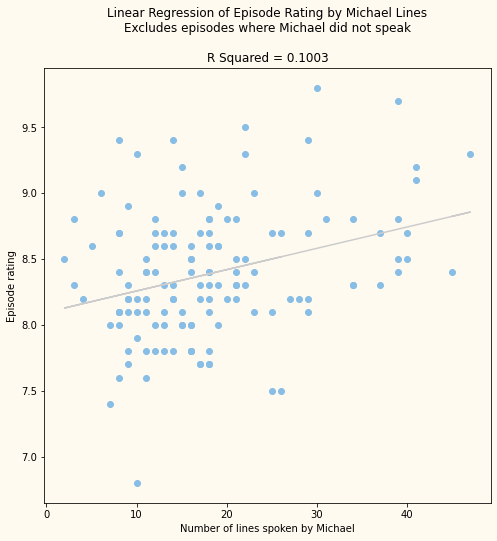

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = np.array(episodes_ratings_and_michael_lines_min1['MichaelLines']).reshape(-1,1)
Y = np.array(episodes_ratings_and_michael_lines_min1['Ratings']).reshape(-1,1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

r2 = r2_score(Y, Y_pred, multioutput='variance_weighted')

fig, ax = plt.subplots(figsize=(8,8))

plt.scatter(X, Y, color = '#88BDE6')
plt.plot(X, Y_pred, color=colour_grey)

ax.set_ylabel('Episode rating')
ax.set_xlabel('Number of lines spoken by Michael')
plt.title('Linear Regression of Episode Rating by Michael Lines\nExcludes episodes where Michael did not speak\n\nR Squared = ' + str(round(r2, 4)))

ax.set_facecolor(colour_plot)
fig.patch.set_facecolor(colour_plot)

We observe a weak positive relationship between Michael's lines and episode rating - the R Squared is only 0.10. I don't think we can conclude too much here.

## Dialogue Analysis

We'll look at frequency of phrases and perform some sentiment analysis.

In [273]:
# https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

# we'll continue working just on the transcript of lines spoken by characters with 150 lines minimum

from textblob import TextBlob
transcript_150min['polarity'] = transcript_150min['line'].apply(lambda x: TextBlob(x).polarity)
transcript_150min['subjective'] = transcript_150min['line'].apply(lambda x: TextBlob(x).subjectivity)

In [274]:
from nltk.corpus import stopwords

stoplist = stopwords.words('english') + ['though']


from sklearn.feature_extraction.text import CountVectorizer
#c_vec_bi = CountVectorizer(stop_words=stoplist, ngram_range=(2,2))
c_vec_tri = CountVectorizer(stop_words=stoplist, ngram_range=(3,3))
#c_vec_tri_nostop = CountVectorizer(ngram_range=(3,3))
c_vec_quad_nostop = CountVectorizer(ngram_range=(4,4))

# matrix of ngrams
#bigrams = c_vec_bi.fit_transform(transcript_150min['line'])
trigrams = c_vec_tri.fit_transform(transcript_150min['line'])
#trigrams_nostop = c_vec_tri_nostop.fit_transform(transcript_150min['line'])
quadgrams_nostop = c_vec_quad_nostop.fit_transform(transcript_150min['line'])

# count frequency of ngrams
#count_values_bi = bigrams.toarray().sum(axis=0)
count_values_tri = trigrams.toarray().sum(axis=0)
#count_values_tri_nostop = trigrams_nostop.toarray().sum(axis=0)
count_values_quad_nostop = quadgrams_nostop.toarray().sum(axis=0)


# list of ngrams
#vocab_bi = c_vec_bi.vocabulary_
vocab_tri = c_vec_tri.vocabulary_
#vocab_tri_nostop = c_vec_tri_nostop.vocabulary_
vocab_quad_nostop = c_vec_quad_nostop.vocabulary_

#df_bigram = pd.DataFrame(sorted([(count_values_bi[i],k) for k,i in vocab_bi.items()], reverse=True)
#            ).rename(columns={0: 'frequency', 1:'bigram'})

df_trigram = pd.DataFrame(sorted([(count_values_tri[i],k) for k,i in vocab_tri.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})

#df_trigram_nostop = pd.DataFrame(sorted([(count_values_tri_nostop[i],k) for k,i in vocab_tri_nostop.items()], reverse=True)
#            ).rename(columns={0: 'frequency', 1:'trigram'})

df_quadgram_nostop = pd.DataFrame(sorted([(count_values_quad_nostop[i],k) for k,i in vocab_quad_nostop.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'quadgram'})

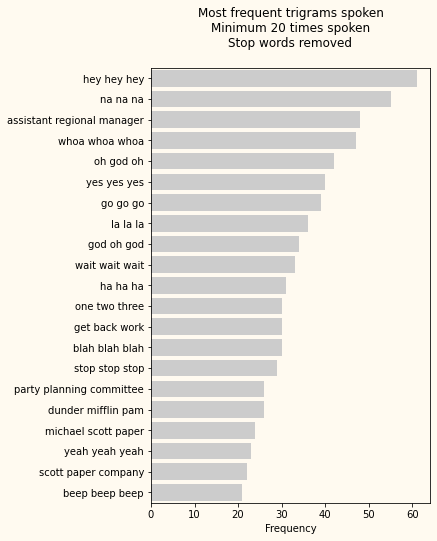

In [275]:
fig, ax = plt.subplots(figsize=(5,8))

sns.barplot(x='frequency', y='trigram', data=df_trigram[df_trigram['frequency'] > 20], ax = ax, dodge = False, color=colour_grey)

plt.title('Most frequent trigrams spoken\nMinimum 20 times spoken\nStop words removed\n')
plt.ylabel(None)
plt.xlabel('Frequency')

ax.set_facecolor(colour_plot)
fig.patch.set_facecolor(colour_plot)

None of this is a surprise. I particularly like the prevalence of:
* "Assistant (to the) Regional Manager"
* "Planning Party Committee"
* "Dunder Mifflin (this is) Pam"

Now let's look at quadrigrams, with stop words included.

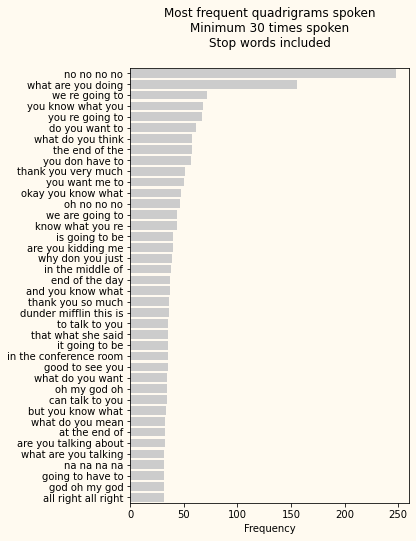

In [276]:
fig, ax = plt.subplots(figsize=(5,8))

sns.barplot(x='frequency', y='quadgram', data=df_quadgram_nostop[df_quadgram_nostop['frequency'] > 30], ax = ax, dodge = False, color=colour_grey)

plt.title('Most frequent quadrigrams spoken\nMinimum 30 times spoken\nStop words included\n')
plt.ylabel(None)
plt.xlabel('Frequency')

ax.set_facecolor(colour_plot)
fig.patch.set_facecolor(colour_plot)

Again, nothing surprising here. My favourites:
* "Okay you know what"
* "Are you kidding me"
* "Why don('t) you just"
* "In the conference room"

and of course
* "That's what she said!"

Finally, let's analyse sentiment.

In [277]:
speaker_sentiment = transcript_150min[['speaker', 'polarity', 'line', 'subjective']].groupby(['speaker']).agg({'line' : 'count', 'polarity': 'sum', 'subjective': 'sum'}).sort_values(by=['line'], ascending = False).reset_index()
speaker_sentiment['polarity_avg'] = speaker_sentiment['polarity'] / speaker_sentiment['line'] 

To accurately assess the differences between average sentiment of characters whist accounting for normal levels of variation and small sample sizes, I opted to use a Funnel Plot as described by the brilliant Stephen Few in his article, Variation and Its Discontents:
https://www.perceptualedge.com/articles/visual_business_intelligence/variation_and_its_discontents.pdf

I created my own Python package - **funnelpy** - to enable me to do this easily on an ongoing basis.
https://github.com/lyonjust/funnelpy

In [278]:
!pip install funnelpy
import funnelpy.funnelpy as fpy

In [279]:
df_sigmas_entireseries, df_data_entireseries = fpy.sigmas(
    groups = speaker_sentiment['speaker'],
    samplesizes = speaker_sentiment['line'],
    incidents = speaker_sentiment['polarity'],
    length = 100
    )

Text(10800, 99    0.079243
Name: lowertwosigma, dtype: float64, '95% Confidence Interval - Lower')

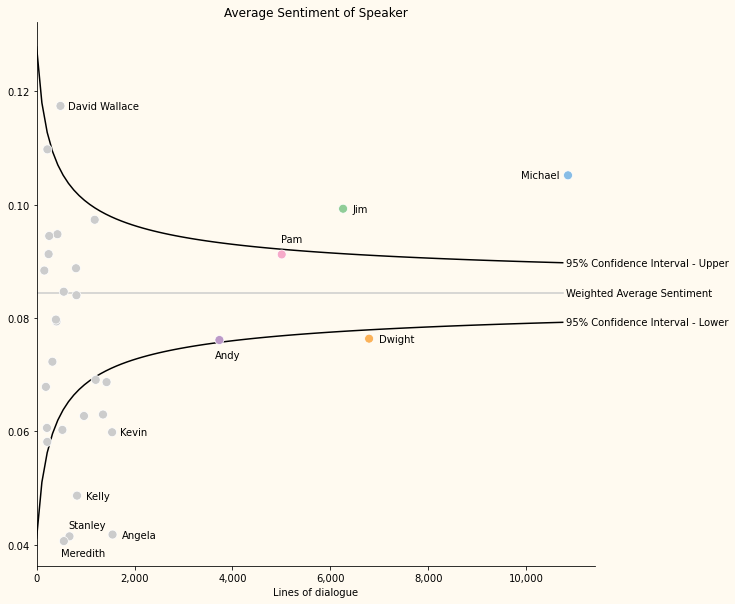

In [ ]:
import matplotlib.ticker as mtick

# build plot
fig, ax = plt.subplots(figsize=(10,10))

# plot curves, utilizing zorder to ensure data points from scatterplot are layered on top of the curves
ax = sns.lineplot(data=df_sigmas_entireseries, x = 'chart_index', y = 'uppertwosigma', color = 'Black', zorder = 1)
ax = sns.lineplot(data=df_sigmas_entireseries, x = 'chart_index', y = 'lowertwosigma', color = 'Black', zorder = 1)
#ax = sns.lineplot(data=df_sigmas, x = 'chart_index', y = 'upperthreesigma', color = 'Black', zorder = 2)
#ax = sns.lineplot(data=df_sigmas, x = 'chart_index', y = 'lowerthreesigma', color = 'Black', zorder = 2)
ax = sns.lineplot(data=df_sigmas_entireseries, x = 'chart_index', y = 'mean', color = colour_grey)
ax = sns.scatterplot(data = df_data_entireseries, x = 'samplesizes', y = 'incident_rates', s = 80, zorder  = 3, hue = 'groups', palette = colours_complete)

# tighten axes limits and give labels
#ax.set_ylim(ymin = -0.2, ymax = 0.35)
ax.set_xlim(xmin = 0)
#plt.yticks(range(0, 110, 10))
plt.title('Average Sentiment of Speaker')
plt.xlabel('Lines of dialogue')
plt.ylabel(None)

ax.set_facecolor(colour_plot)
fig.patch.set_facecolor(colour_plot)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend_.remove()

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.annotate('Angela', (1750, 0.041770), va = 'center')
plt.annotate('Michael', (9900, 0.105201), va = 'center')
plt.annotate('Dwight', (7000, 0.076356), va = 'center')
plt.annotate('Jim', (6450, 0.099300), va = 'center')
plt.annotate('Pam', (5000, 0.094), va = 'center')
plt.annotate('Andy', (3650, 0.0735), va = 'center')
plt.annotate('Kevin', (1700, 0.059834), va = 'center')
plt.annotate('David Wallace', (650, 0.117456), va = 'center')
plt.annotate('Stanley', (657, 0.0435), va = 'center')
plt.annotate('Kelly', (1000, 0.048638), va = 'center')
plt.annotate('Meredith', (500, 0.0385), va = 'center')

plt.annotate('Weighted Average Sentiment', (10800, df_sigmas_entireseries.iloc[[-1]]['mean']), va = 'center')
plt.annotate('95% Confidence Interval - Upper', (10800, df_sigmas_entireseries.iloc[[-1]]['uppertwosigma']), va = 'center')
plt.annotate('95% Confidence Interval - Lower', (10800, df_sigmas_entireseries.iloc[[-1]]['lowertwosigma']), va = 'center')

The black upper and lower curves represent the 95% confidence interval. This means that characters falling outside of this range have an average sentiment of their dialogue that is statistically significantly positive (above the upper curve) or negative (below the lower curve) relative to the average sentiment of all dialogue in the series. 

Note that we can make assessments of the statistical significance of *relative* sentiment, but a character being "relatively negative" doesn't necessarily suggest their dialogue was objectively negative on average. For example, in this plot, the average sentiment ranges from about 0.04 to 0.12. For reference, the possible spectrum of this measure from the package used is -1.0 (completely negative) to 1.0 (completely positive). 

We observe that Meredith, Angela and Stanley are relatively very negative on average. Nothing shocking here.

Jim and David Wallace are statistically positive on average.

And that leaves us with Michael, who is extremely positive relative to the rest of the characters. Finding a character more statistically positive would be very hard. 

(That's what she said.)